In [1]:
import os
import tensorflow as tf
import pandas as pd
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import load_model
from dataset_path import output_path
from keras.models import Sequential, Model,load_model
from keras.layers import Dense, Dropout, Activation, LSTM,  Input, concatenate
from tensorflow.keras import optimizers, metrics
import os
from thesis_helper import * 

pd.set_option('float_format', '{:.3f}'.format)
path = output_path

output_path = os.path.join(path, "Figure3")
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_train = pd.read_csv((os.path.join(path, 'train.csv')))
df_test = pd.read_csv((os.path.join(path, 'test.csv')))
confidence_interval = 95
random_seed = 0
result_list = []


In [2]:
X_train,y_train,X_test,y_test = preprocessing(path,df_train,df_test)

Before filtering: training size = 334480 , testing size = 83620
After filtering: training size = 176213 , testing size = 44063


In [3]:
variable = ["age", "gender", 
        
        "n_ed_30d", "n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
        "n_hosp_365d", "n_icu_30d", "n_icu_90d", "n_icu_365d", 
        
        "triage_pain", "triage_acuity",
        
        "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache", 
        "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
        "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope",
        "chiefcom_dizziness",
        
        "cci_MI", "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", "cci_Pulmonary", 
        "cci_Rheumatic", "cci_PUD", "cci_Liver1", "cci_DM1", "cci_DM2", 
        "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", "cci_Cancer2", 
        "cci_HIV",
        
        "eci_Arrhythmia", "eci_Valvular", "eci_PHTN",  "eci_HTN1", "eci_HTN2",  
        "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
        "eci_Obesity", "eci_WeightLoss", "eci_FluidsLytes", "eci_BloodLoss", 
        "eci_Anemia", "eci_Alcohol", "eci_Drugs", "eci_Psychoses", "eci_Depression",
        
        "ed_temperature_last", "ed_heartrate_last", "ed_resprate_last", 
        "ed_o2sat_last", "ed_sbp_last", "ed_dbp_last", "ed_los", "n_med", "n_medrecon"]

outcome = "outcome_ed_revisit_3d"
resample_freq = '1H' #'30T'
df_vitalsign = pd.read_csv(os.path.join(path, 'ed_vitalsign_' + resample_freq + '_resampled.csv'))

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6917267683624388
AUPRC: 0.16656956491535974
Sensitivity: 0.6142723880597015
Specificity: 0.6529497363963834
Score thresold: 0.041579738381893064
2.5 97.5


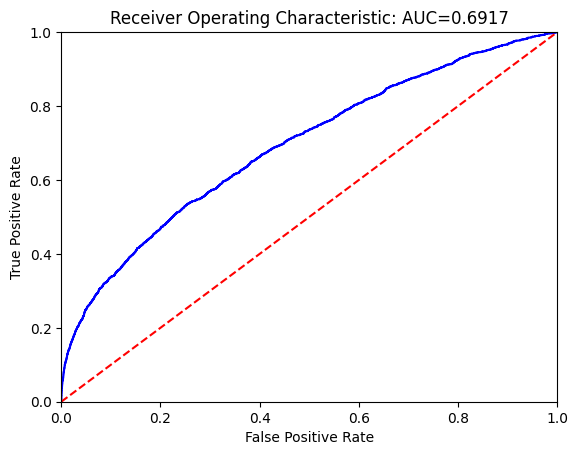

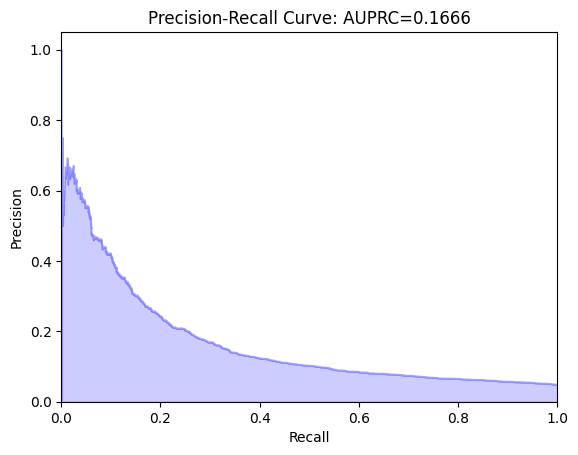

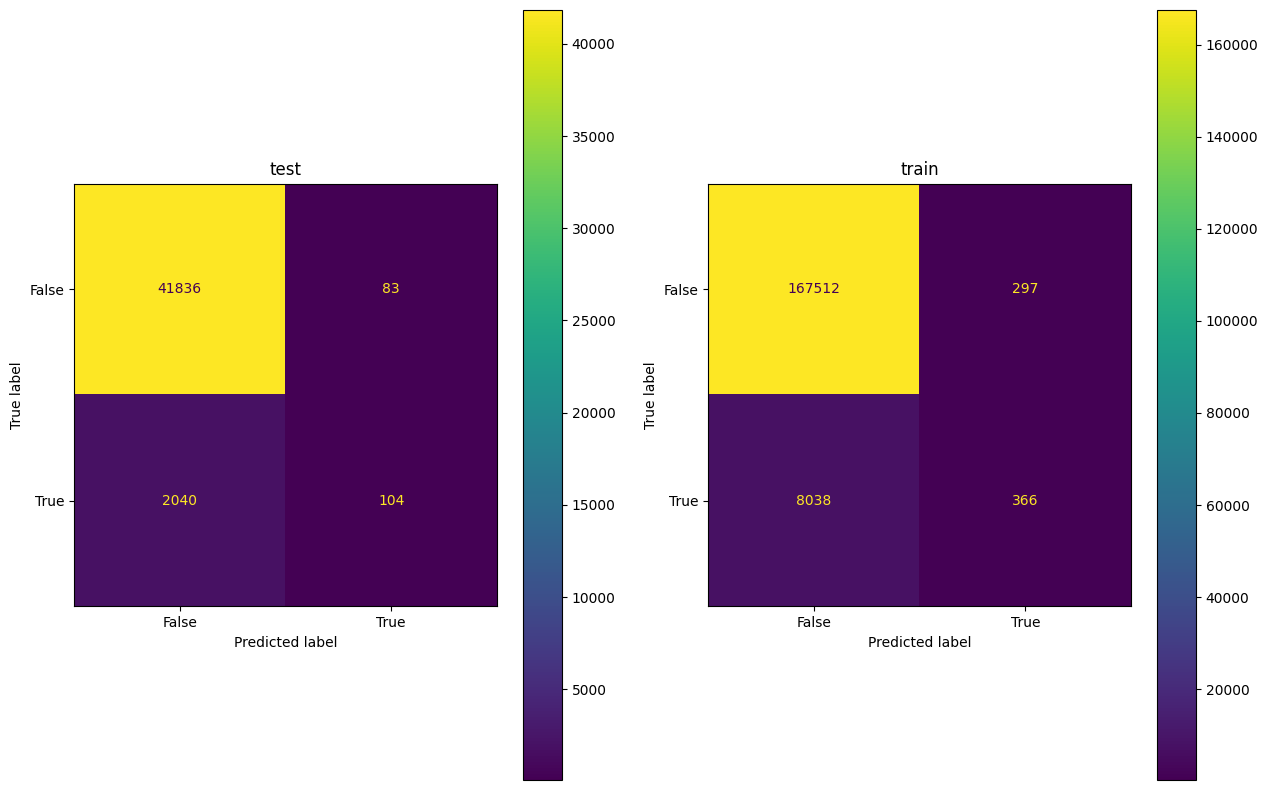

In [4]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
PCA_m = PCA()
PCA_m.fit(X_train)
train_img_pca = PCA_m.transform(X_train)
test_img_pca = PCA_m.transform(X_test)

pca_lr_model,result,runtime = LR_result(train_img_pca, y_train,test_img_pca,y_test,confidence_interval,random_seed)
CM_plot_train_test(pca_lr_model,train_img_pca,y_train,test_img_pca ,y_test)

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6903159540449901
AUPRC: 0.16717847242917608
Sensitivity: 0.6002798507462687
Specificity: 0.6657840120231876
Score thresold: 0.46123613832166227
2.5 97.5


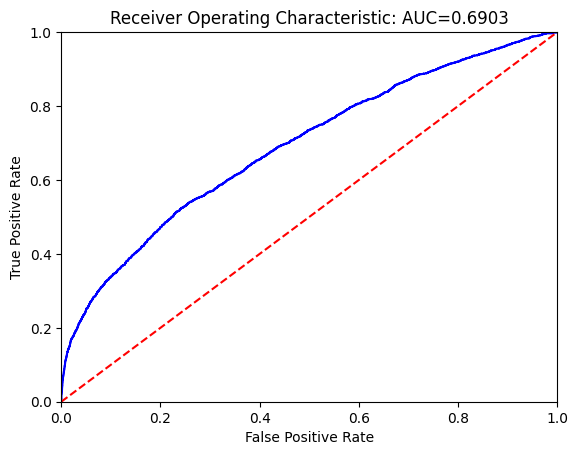

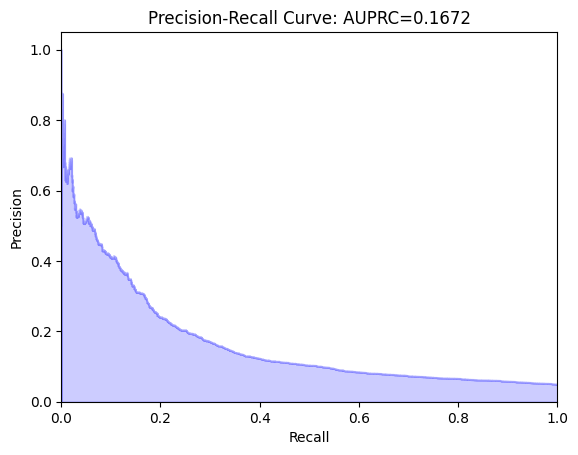

In [5]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

PCA_m = PCA()
PCA_m.fit(X_train)
train_img_pca = PCA_m.transform(X_train)
test_img_pca = PCA_m.transform(X_test)



ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(train_img_pca,y_train)
pca_lr_model,result,runtime = LR_result(X_ros, y_ros,test_img_pca,y_test,confidence_interval,random_seed)

In [6]:
train_img_pca = pd.DataFrame(train_img_pca,columns = X_train.columns)
test_img_pca = pd.DataFrame(test_img_pca,columns = X_test.columns)
train_img_pca['stay_id'] = df_train['stay_id']
test_img_pca['stay_id'] = df_test['stay_id']
# ros = RandomOverSampler(sampling_strategy='minority')
# X_ros, y_ros = ros.fit_resample(train_img_pca,y_train)
train_img_pca['outcome_ed_revisit_3d'] = y_train
test_img_pca['outcome_ed_revisit_3d'] = y_test
train_data_gen, test_data_gen = convert_data(train_img_pca, test_img_pca, variable,df_vitalsign)

In [9]:
input_1  = Input(shape=(train_data_gen.shape[1], train_data_gen.shape[2]),  name='input_1')
dense_1 = Dense(96, activation='relu')(input_1)
lstm1  = LSTM(32, name='lstm1')(input_1)
output1 = Dense(64, activation='relu')(lstm1)
output2 = Dense(1, activation='sigmoid')(output1)
lstm = Model(inputs=[input_1], outputs=output2)
lstm.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC', 
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10)
    ,]
epoch_num = 20
start = time.time()
lstm.fit(train_data_gen,y_train,epochs =epoch_num, batch_size = 200,callbacks=my_callbacks,
                    validation_data=(test_data_gen , y_test))
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
lstm.save('72h_ed_revisit_lstm')

Epoch 1/20
882/882 [==============================] - 29s 30ms/step - loss: 0.1999 - accuracy: 0.9517 - auc: 0.5552 - true_positives: 5.0000 - true_negatives: 167690.0000 - precision: 0.0403 - recall: 5.9495e-04 - val_loss: 0.1882 - val_accuracy: 0.9513 - val_auc: 0.6287 - val_true_positives: 0.0000e+00 - val_true_negatives: 41919.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
882/882 [==============================] - 26s 29ms/step - loss: 0.1849 - accuracy: 0.9523 - auc: 0.6195 - true_positives: 0.0000e+00 - true_negatives: 167809.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1877 - val_accuracy: 0.9513 - val_auc: 0.6421 - val_true_positives: 0.0000e+00 - val_true_negatives: 41919.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
882/882 [==============================] - 26s 29ms/step - loss: 0.1834 - accuracy: 0.9523 - auc: 0.6267 - true_positives: 0.0000e+00 - true_negatives: 167809.0000 - precision: 0.0000e+00 - recall: 0

INFO:tensorflow:Assets written to: 72h_ed_revisit_lstm\assets


INFO:tensorflow:Assets written to: 72h_ed_revisit_lstm\assets


5507/5507 [==============================] - 23s 4ms/step
2.5 97.5
2.5 97.5


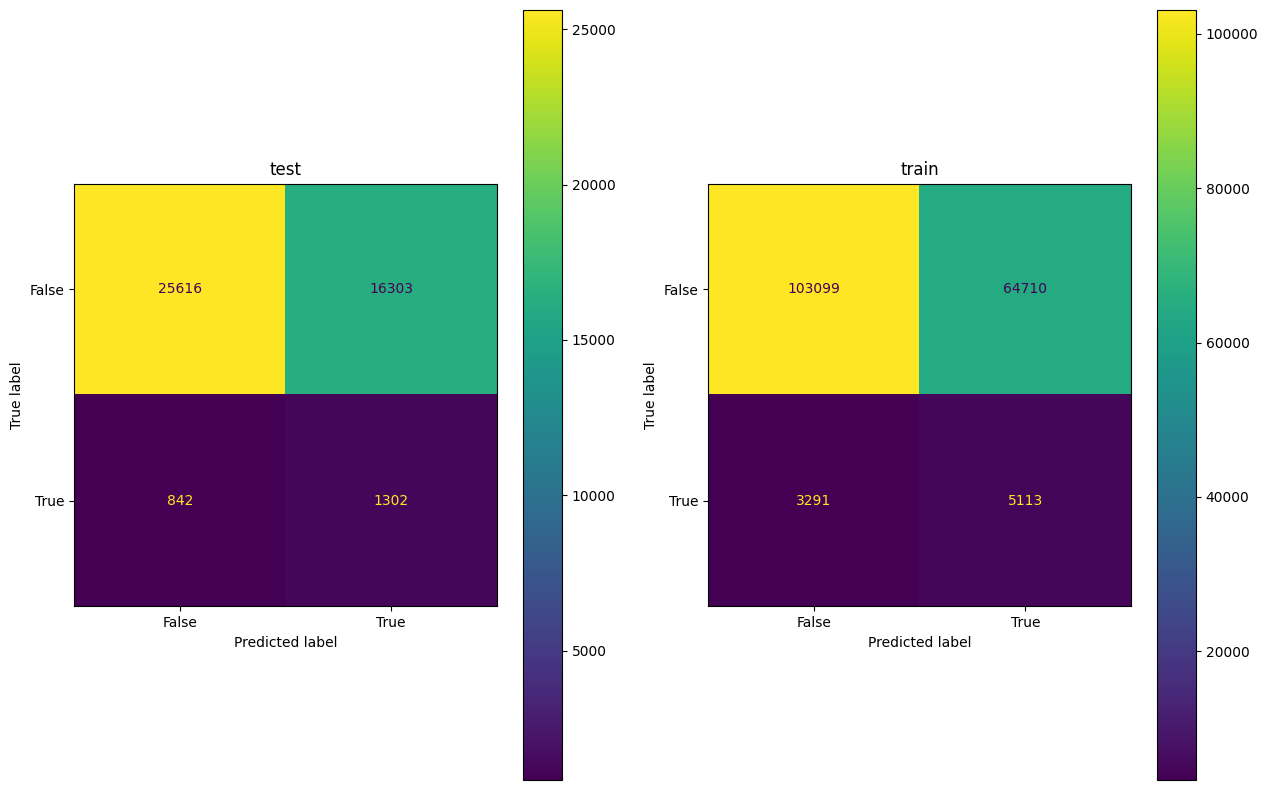

In [10]:
from sklearn import metrics
import matplotlib as plt
lstm = load_model('72h_ed_revisit_lstm')
CM_plot_train_test_DL(lstm,train_data_gen,y_train,test_data_gen,y_test)


In [14]:
train_img_pca = pd.DataFrame(train_img_pca,columns = X_train.columns)
test_img_pca = pd.DataFrame(test_img_pca,columns = X_test.columns)
train_img_pca['stay_id'] = df_train['stay_id']
test_img_pca['stay_id'] = df_test['stay_id']
ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(train_img_pca,y_train)
X_ros['outcome_ed_revisit_3d'] = y_ros
test_img_pca['outcome_ed_revisit_3d'] = y_test
train_data_gen, test_data_gen = convert_data(X_ros, test_img_pca, variable,df_vitalsign)

In [18]:
input_1  = Input(shape=(train_data_gen.shape[1], train_data_gen.shape[2]),  name='input_1')
dense_1 = Dense(96, activation='relu')(input_1)
lstm1  = LSTM(32, name='lstm1')(input_1)
output1 = Dense(64, activation='relu')(lstm1)
output2 = Dense(1, activation='sigmoid')(output1)
lstm = Model(inputs=[input_1], outputs=output2)
lstm.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC', 
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10)
    ,]
epoch_num = 20
start = time.time()
lstm.fit(train_data_gen,y_ros,epochs =epoch_num, batch_size = 200,callbacks=my_callbacks,
                    validation_data=(test_data_gen , y_test))
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
lstm.save('72h_ed_revisit_lstm_ros')

Epoch 1/20
1679/1679 [==============================] - 49s 28ms/step - loss: 0.6622 - accuracy: 0.5846 - auc: 0.6186 - true_positives: 71743.0000 - true_negatives: 124452.0000 - precision: 0.6233 - recall: 0.4275 - val_loss: 0.6702 - val_accuracy: 0.6767 - val_auc: 0.6416 - val_true_positives: 1116.0000 - val_true_negatives: 28703.0000 - val_precision: 0.0779 - val_recall: 0.5205
Epoch 2/20
1679/1679 [==============================] - 46s 28ms/step - loss: 0.6486 - accuracy: 0.6018 - auc: 0.6421 - true_positives: 72439.0000 - true_negatives: 129546.0000 - precision: 0.6544 - recall: 0.4317 - val_loss: 0.5968 - val_accuracy: 0.8701 - val_auc: 0.6509 - val_true_positives: 660.0000 - val_true_negatives: 37680.0000 - val_precision: 0.1347 - val_recall: 0.3078
Epoch 3/20
1679/1679 [==============================] - 46s 28ms/step - loss: 0.6447 - accuracy: 0.6077 - auc: 0.6515 - true_positives: 75998.0000 - true_negatives: 127972.0000 - precision: 0.6561 - recall: 0.4529 - val_loss: 0.5915 

INFO:tensorflow:Assets written to: 72h_ed_revisit_lstm_ros\assets


INFO:tensorflow:Assets written to: 72h_ed_revisit_lstm_ros\assets


10489/10489 [==============================] - 44s 4ms/step
2.5 97.5
2.5 97.5


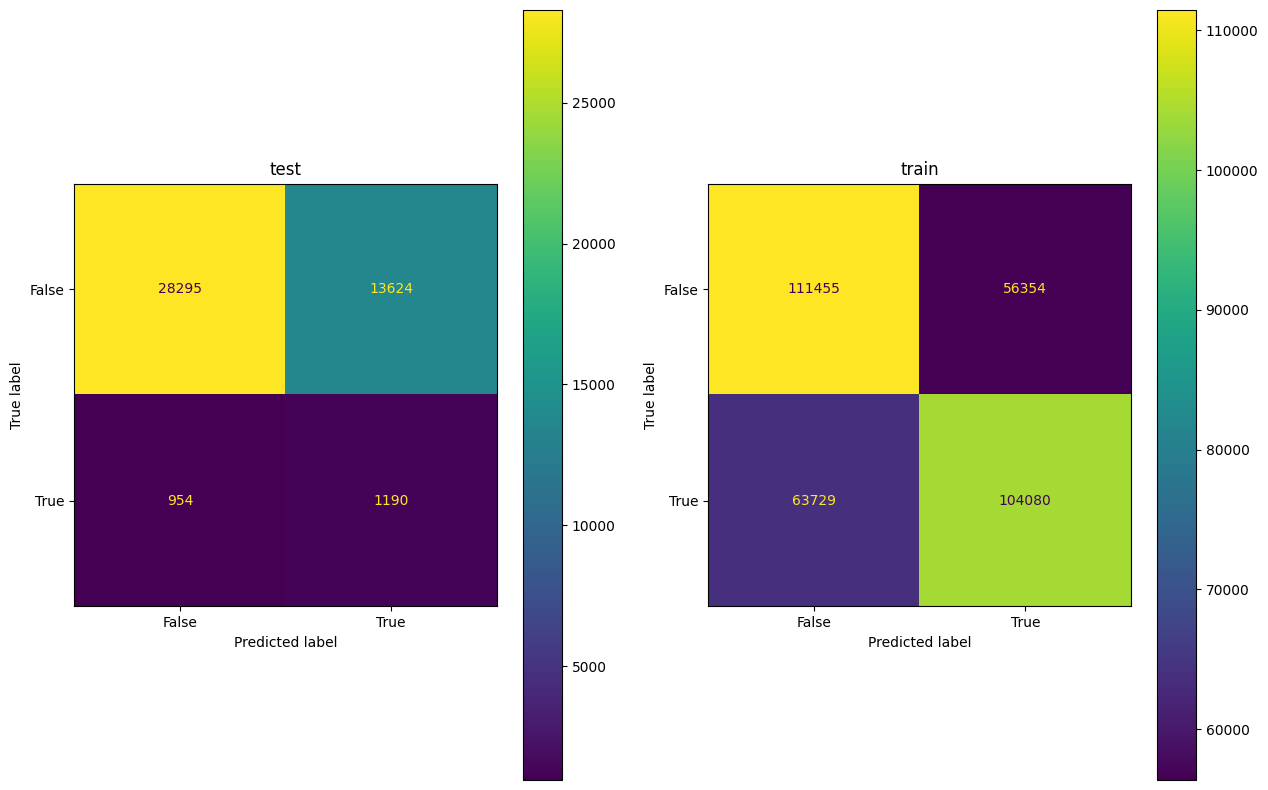

In [20]:
from sklearn import metrics
import matplotlib as plt
lstm = load_model('72h_ed_revisit_lstm_ros')
CM_plot_train_test_DL(lstm,train_data_gen,y_ros,test_data_gen,y_test)

1377/1377 [==============================] - 6s 4ms/step
AUC: 0.6536690296104106
AUPRC: 0.14257960133777853
Sensitivity: 0.5550373134328358
Specificity: 0.6749922469524559
Score thresold: 0.46594068
2.5 97.5


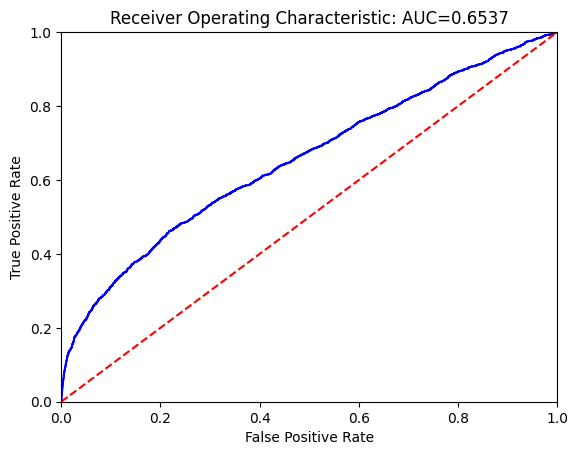

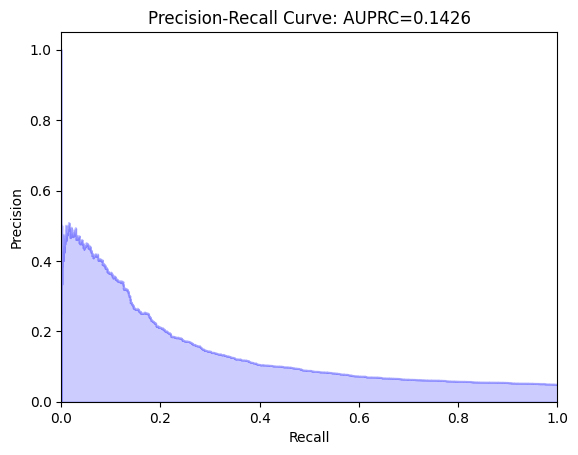

In [23]:
probs = lstm.predict([test_data_gen])
result_multilstm = PlotROCCurve(probs, y_test, ci=95, random_seed=0)